# Communal Conflict model in Ethiopia
## Ethiopia, admin2, monthly data
### 1. Random Forest Classifier 

In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import xgboost
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [117]:
#os.chdir('/home/ubuntu/darpa/models/conflict_probability')

In [118]:
#url = 'https://data.kimetrica.com/dataset/4dbc3cc7-9474-49f2-bfd4-231e78401caa/resource/7423b71d-ce8c-437c-9fe6-2d9ba58d6155/download/dataset_communal_cnflict_model.csv'
df = pd.read_csv('/Users/yaredhurisa/Google Drive/Probability of conflict/indicators/eth_cc_final_dataset.csv')
list(df.columns)

['Unnamed: 0',
 'date',
 'group',
 'cc_onset_current',
 'fatalities_current',
 'cc_onset_lag',
 'fatalities_lag',
 'actor_state',
 'actor_rebel_groups',
 'actor_political_militias',
 'actor_identity_militias',
 'actor_civilians',
 'actor_others',
 'inflation_all',
 'rainfall',
 'temperature mean',
 'btotl',
 'maize_ETB_KG',
 'teff_ETB_KG',
 'wheat_ETB_KG',
 'mean ndvi',
 'fs_Crisis',
 'fs_Emergency',
 'fs_Famine',
 'fs_Minimal',
 'fs_Stressed']

In [119]:
df=df.drop(['fatalities_current'], axis=1)

In [120]:
#Training, validation and test 
start_date = "2009-12-1"
end_date = "2018-1-1"
mask = (df['date'] > start_date) & (df['date'] < end_date)
train = df.loc[mask]

start_date = "2017-12-1"
end_date = "2019-1-1"
mask = (df['date'] > start_date) & (df['date'] < end_date)
test = df.loc[mask]


In [121]:
train.shape

(5775, 25)

In [122]:
X= df[[
   'cc_onset_lag',
 'fatalities_lag',
 'actor_state',
 'actor_rebel_groups',
 'actor_political_militias',
 'actor_identity_militias',
 'actor_civilians',
 'actor_others',
 'inflation_all',
 'rainfall',
 'temperature mean',
 'btotl',
 'maize_ETB_KG',
 'teff_ETB_KG',
 'wheat_ETB_KG',
 'mean ndvi',
 'fs_Crisis',
 'fs_Emergency',
 'fs_Famine',
 'fs_Minimal',
 'fs_Stressed'
  ]]

In [123]:
y = df['cc_onset_current']

In [124]:
X_train = train[[
   'cc_onset_lag',
 'fatalities_lag',
 'actor_state',
 'actor_rebel_groups',
 'actor_political_militias',
 'actor_identity_militias',
 'actor_civilians',
 'actor_others',
 'inflation_all',
 'rainfall',
 'temperature mean',
 'btotl',
 'maize_ETB_KG',
 'teff_ETB_KG',
 'wheat_ETB_KG',
 'mean ndvi',
 'fs_Crisis',
 'fs_Emergency',
 'fs_Famine',
 'fs_Minimal',
 'fs_Stressed'
  ]]

In [125]:
y_train = train['cc_onset_current']

In [126]:
X_test = test[[
   'cc_onset_lag',
 'fatalities_lag',
 'actor_state',
 'actor_rebel_groups',
 'actor_political_militias',
 'actor_identity_militias',
 'actor_civilians',
 'actor_others',
 'inflation_all',
 'rainfall',
 'temperature mean',
 'btotl',
 'maize_ETB_KG',
 'teff_ETB_KG',
 'wheat_ETB_KG',
 'mean ndvi',
 'fs_Crisis',
 'fs_Emergency',
 'fs_Famine',
 'fs_Minimal',
 'fs_Stressed']]

In [127]:
y_test = test['cc_onset_current']

# Visualize the data distribution

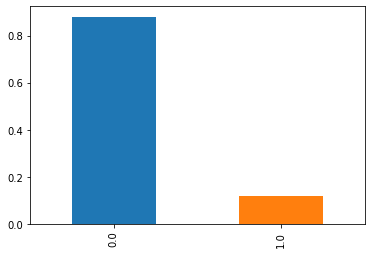

In [128]:
break_down = y_test.value_counts(normalize=True)
break_down.plot(kind='bar')
plt.show()
#ax = train['conflict_onset'].plot.bar(rot=0)

### Classical RF

In [129]:
rf=RandomForestClassifier()

In [130]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [131]:
rf_train_prediction=rf_grid.predict(X_train)

In [132]:
confusion_matrix(y_train, rf_train_prediction)

array([[5486,  142],
       [  23,  124]])

In [133]:
from sklearn.metrics import classification_report
print(classification_report(y_train, rf_train_prediction))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99      5628
         1.0       0.47      0.84      0.60       147

    accuracy                           0.97      5775
   macro avg       0.73      0.91      0.79      5775
weighted avg       0.98      0.97      0.98      5775



In [134]:
rf_test_prediction=rf_grid.predict(X_test)

In [135]:
confusion_matrix(y_test, rf_test_prediction)

array([[495,  86],
       [ 36,  43]])

In [136]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_test_prediction))

              precision    recall  f1-score   support

         0.0       0.93      0.85      0.89       581
         1.0       0.33      0.54      0.41        79

    accuracy                           0.82       660
   macro avg       0.63      0.70      0.65       660
weighted avg       0.86      0.82      0.83       660



# Train RF with gridsearch

In [137]:
rf_model =RandomForestClassifier(class_weight='balanced')

params={
      'bootstrap': [True],
 'max_depth': [8,10,12],
  'min_samples_split':[2,6,8],
  'min_samples_leaf': [2,4,6],
   }

In [138]:
rf_grid = GridSearchCV(rf_model, params, cv=5)
rf_grid.fit(X_train, y_train)
print(rf_grid.best_params_)

{'bootstrap': True, 'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [139]:
rf_test_prediction=rf_grid.predict(X_test)

In [140]:
confusion_matrix(y_test, rf_test_prediction)

array([[496,  85],
       [ 35,  44]])

In [141]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_test_prediction))

              precision    recall  f1-score   support

         0.0       0.93      0.85      0.89       581
         1.0       0.34      0.56      0.42        79

    accuracy                           0.82       660
   macro avg       0.64      0.71      0.66       660
weighted avg       0.86      0.82      0.84       660

